# Build a scoring model

### Missions:
- Transform the relevant variables for a classic supervised model (= feature engineering)
- Train a classic supervised model that meets the expectations of the trades
- Evaluate the performance of a classic supervised model
- Adapt the hyperparameters of a classic supervised learning model in order to improve it

### Dataset from : https://www.kaggle.com/c/home-credit-default-risk/data

### Interesting Kaggle :
- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
- https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering
- https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search

### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import preprocessing
from sklearn import decomposition

from functions import *

In [3]:
pd.set_option('display.max_columns', None)  

In [4]:
application_train_data = pd.read_csv('application_train.csv', sep=',')
application_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 1.Feature engineering

## Description of the dataset

In [5]:
longueur = len(application_train_data.count(axis=1))
largeur = len(application_train_data.count())
print("The dataset has",longueur,"rows and", largeur,"columns.")

The dataset has 307511 rows and 122 columns.


In [6]:
for index,column in enumerate(application_train_data.columns):
        print(index,column)  

0 SK_ID_CURR
1 TARGET
2 NAME_CONTRACT_TYPE
3 CODE_GENDER
4 FLAG_OWN_CAR
5 FLAG_OWN_REALTY
6 CNT_CHILDREN
7 AMT_INCOME_TOTAL
8 AMT_CREDIT
9 AMT_ANNUITY
10 AMT_GOODS_PRICE
11 NAME_TYPE_SUITE
12 NAME_INCOME_TYPE
13 NAME_EDUCATION_TYPE
14 NAME_FAMILY_STATUS
15 NAME_HOUSING_TYPE
16 REGION_POPULATION_RELATIVE
17 DAYS_BIRTH
18 DAYS_EMPLOYED
19 DAYS_REGISTRATION
20 DAYS_ID_PUBLISH
21 OWN_CAR_AGE
22 FLAG_MOBIL
23 FLAG_EMP_PHONE
24 FLAG_WORK_PHONE
25 FLAG_CONT_MOBILE
26 FLAG_PHONE
27 FLAG_EMAIL
28 OCCUPATION_TYPE
29 CNT_FAM_MEMBERS
30 REGION_RATING_CLIENT
31 REGION_RATING_CLIENT_W_CITY
32 WEEKDAY_APPR_PROCESS_START
33 HOUR_APPR_PROCESS_START
34 REG_REGION_NOT_LIVE_REGION
35 REG_REGION_NOT_WORK_REGION
36 LIVE_REGION_NOT_WORK_REGION
37 REG_CITY_NOT_LIVE_CITY
38 REG_CITY_NOT_WORK_CITY
39 LIVE_CITY_NOT_WORK_CITY
40 ORGANIZATION_TYPE
41 EXT_SOURCE_1
42 EXT_SOURCE_2
43 EXT_SOURCE_3
44 APARTMENTS_AVG
45 BASEMENTAREA_AVG
46 YEARS_BEGINEXPLUATATION_AVG
47 YEARS_BUILD_AVG
48 COMMONAREA_AVG
49 ELEVATORS_AV

In [7]:
application_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Cleaning and testing dataset : Application_train.csv

### Missing values
We are going to check how much percent of missing values each column has.

In [8]:
def showMissingValues(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Percent of missing values per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Column with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Column with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Column', size=15, weight='bold')
    plt.ylabel('Percent of missing values', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

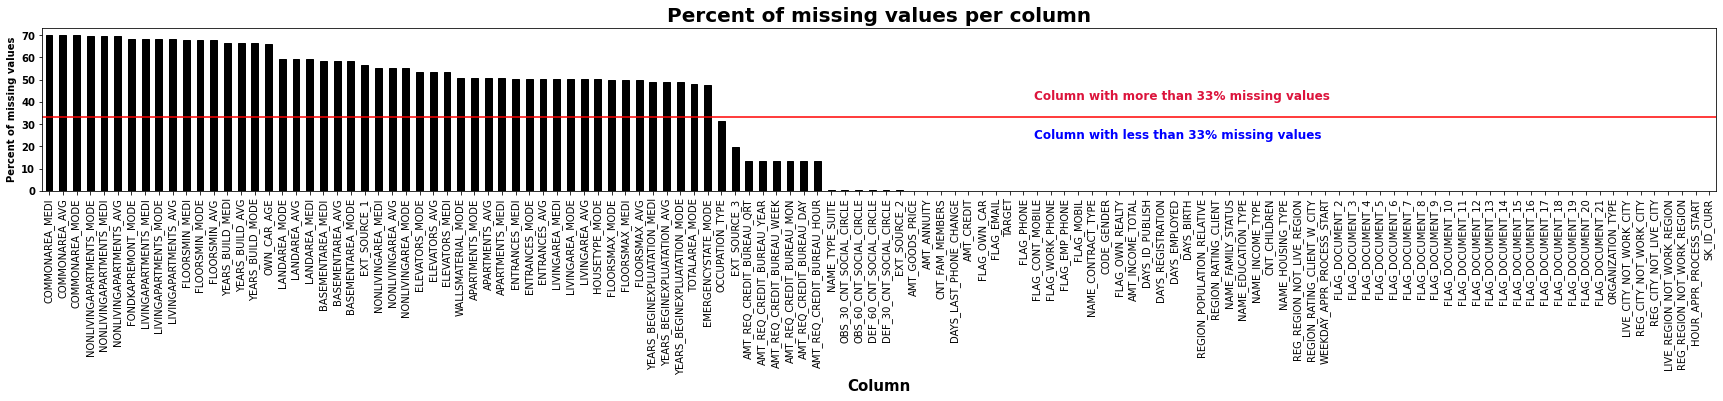

In [9]:
showMissingValues(application_train_data,33, width= 30)

According to our previous graph, we are goibng to delete all the column who has more than 33% missing values.

In [206]:
application_train_data_filtered = application_train_data.copy()

for index,column in enumerate(application_train_data.columns):
        if(application_train_data[column].isnull().mean()*100 > 33):
            application_train_data_filtered = application_train_data_filtered.drop([column], axis=1)             

### Transforming Categorical Data

In [207]:
def transformCategorical(data, threshold):
    
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.preprocessing import LabelEncoder
    OHencoder = OneHotEncoder(handle_unknown='ignore')
    labelencoder=LabelEncoder()
    
    #Retrieve categorical columns
    columns = data.columns.tolist()
    columnsNum = data._get_numeric_data().columns.tolist()
    for columnNum in columnsNum:
        columns.remove(columnNum)
    
    #Separate label encoder and one-hot encoding
    for column in columns:
        if len(data[column].value_counts()) > threshold: #one-hot encoding
            print(column, '> threshold')
            x = data[column].values.reshape(1, -1)

            x = numpy.array(pd.DataFrame(x).fillna('NaN').T).tolist()
            print(OHencoder.fit_transform(x).toarray())
        else: #label encoder      
            data[column] = labelencoder.fit_transform(data[column].astype(str))
    return data   

In [208]:
application_train_data_filtered = transformCategorical(application_train_data_filtered, 3)

NAME_TYPE_SUITE > threshold
[[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
NAME_INCOME_TYPE > threshold
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
NAME_EDUCATION_TYPE > threshold
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]
NAME_FAMILY_STATUS > threshold
[[0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
NAME_HOUSING_TYPE > threshold
[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
OCCUPATION_TYPE > threshold
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

In [210]:
application_train_data_filtered

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Filling NaN

Columns with Nan are categorical column, we can't fill nan with mean (which will result in a float) or with 0 (which will result into modifying a lot the dataset). The best thing we can do is by imputing with Sklearn

In [121]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(application_train_data_filtered)
IterativeImputer(random_state=0)

IterativeImputer(random_state=0)

In [ ]:
application_train_data_filtered_imp = pd.DataFrame(np.round(imp.transform(application_train_data_filtered)), columns=application_train_data_filtered.columns)

## Correlation

In [86]:
fig = px.imshow(application_train_data_filtered_imp.corr())

fig.update_layout(coloraxis_colorbar=dict(
    title="Niveau de correlation",
    tickvals=[-1, -0.5, 0,0.5, 1],
    ticktext=["Inverse", "Moyennement inverse", "Nulle", "Moyenne", "Forte"],
))

fig.update_layout(autosize=False,
    width=1000,
    height=1000,)

fig.show()

NameError: name 'application_train_data_filtered_imp' is not defined

We can see correlation between AMT_REQ_CREDIT variables, and a bit between geolocalisation variables.

# Analysis

#### Contrat type

<function matplotlib.pyplot.show(close=None, block=None)>

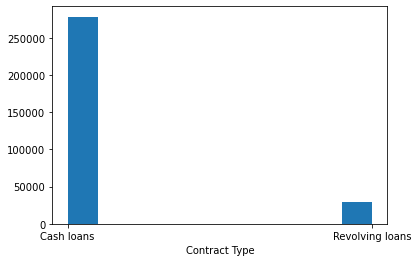

In [22]:
plt.hist(application_train_data.NAME_CONTRACT_TYPE)
plt.xlabel('Contract Type')
plt.show

#### Family situation

In [23]:
CNT_CHILDREN = application_train_data.CNT_CHILDREN.value_counts()
NAME_FAMILY_STATUS = application_train_data.NAME_FAMILY_STATUS.value_counts()
CNT_FAM_MEMBERS = application_train_data.CNT_FAM_MEMBERS.value_counts()

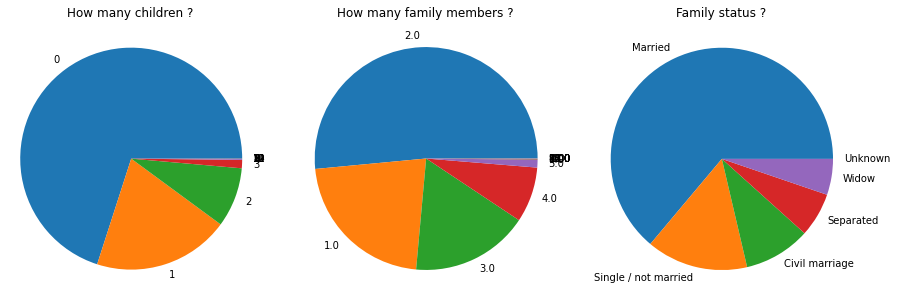

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.pie(CNT_CHILDREN, labels=CNT_CHILDREN.index)
ax1.axis('equal')  
ax1.set_title('How many children ?')

ax2.pie(CNT_FAM_MEMBERS, labels=CNT_FAM_MEMBERS.index)
ax2.axis('equal')
ax2.set_title('How many family members ?')


ax3.pie(NAME_FAMILY_STATUS, labels=NAME_FAMILY_STATUS.index)
ax3.axis('equal')
ax3.set_title('Family status ?')

plt.show()

#### Financial situation

In [27]:
FLAG_OWN_CAR = application_train_data.FLAG_OWN_CAR.value_counts()
FLAG_OWN_REALTY = application_train_data.FLAG_OWN_REALTY.value_counts()
AMT_INCOME_TOTAL = application_train_data.AMT_INCOME_TOTAL.value_counts()
AMT_INCOME_TOTAL = AMT_INCOME_TOTAL[AMT_INCOME_TOTAL.values > 10000]

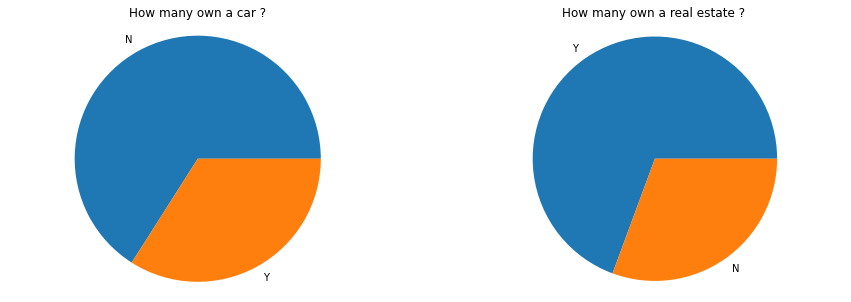

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.pie(FLAG_OWN_CAR, labels=FLAG_OWN_CAR.index)
ax1.axis('equal')  
ax1.set_title('How many own a car ?')

ax2.pie(FLAG_OWN_REALTY, labels=FLAG_OWN_REALTY.index)
ax2.axis('equal')
ax2.set_title('How many own a real estate ?')

plt.show()

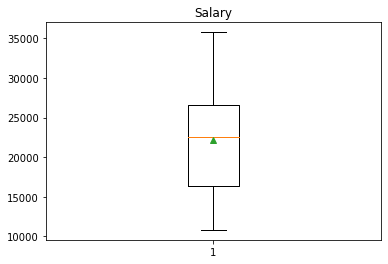

In [33]:
plt.boxplot(AMT_INCOME_TOTAL, showmeans=True)
plt.title('Salary')
plt.show()

#### Jobs & Education

In [75]:
NAME_INCOME_TYPE = application_train_data.NAME_INCOME_TYPE.value_counts()
NAME_EDUCATION_TYPE = application_train_data.NAME_EDUCATION_TYPE.value_counts()
DAYS_EMPLOYED = application_train_data_filtered.DAYS_EMPLOYED
YEARS_EMPLOYED = DAYS_EMPLOYED.apply(lambda DAYS_EMPLOYED: np.round((DAYS_EMPLOYED/365), 0))
OCCUPATION_TYPE = application_train_data.OCCUPATION_TYPE.value_counts()

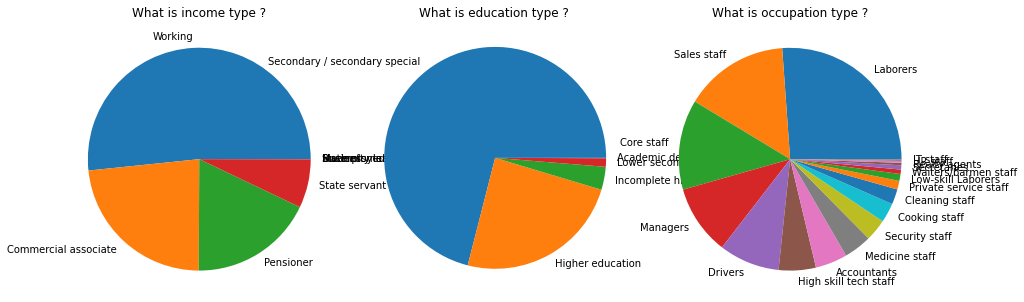

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.pie(NAME_INCOME_TYPE, labels=NAME_INCOME_TYPE.index)
ax1.axis('equal')  
ax1.set_title('What is income type ?')

ax2.pie(NAME_EDUCATION_TYPE, labels=NAME_EDUCATION_TYPE.index)
ax2.axis('equal')
ax2.set_title('What is education type ?')


ax3.pie(OCCUPATION_TYPE, labels=OCCUPATION_TYPE.index)
ax3.axis('equal')
ax3.set_title('What is occupation type ?')

plt.show()

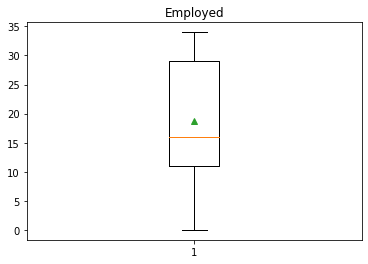

In [76]:
plt.boxplot(YEARS_EMPLOYED, showmeans=True)
plt.title('Employed')
plt.show()

In [227]:
for index,column in enumerate(application_train_data_filtered.columns):
        print(index,column)  

0 SK_ID_CURR
1 TARGET
2 NAME_CONTRACT_TYPE
3 CODE_GENDER
4 FLAG_OWN_CAR
5 FLAG_OWN_REALTY
6 CNT_CHILDREN
7 AMT_INCOME_TOTAL
8 AMT_CREDIT
9 AMT_ANNUITY
10 AMT_GOODS_PRICE
11 NAME_TYPE_SUITE
12 NAME_INCOME_TYPE
13 NAME_EDUCATION_TYPE
14 NAME_FAMILY_STATUS
15 NAME_HOUSING_TYPE
16 REGION_POPULATION_RELATIVE
17 DAYS_BIRTH
18 DAYS_EMPLOYED
19 DAYS_REGISTRATION
20 DAYS_ID_PUBLISH
21 FLAG_MOBIL
22 FLAG_EMP_PHONE
23 FLAG_WORK_PHONE
24 FLAG_CONT_MOBILE
25 FLAG_PHONE
26 FLAG_EMAIL
27 OCCUPATION_TYPE
28 CNT_FAM_MEMBERS
29 REGION_RATING_CLIENT
30 REGION_RATING_CLIENT_W_CITY
31 WEEKDAY_APPR_PROCESS_START
32 HOUR_APPR_PROCESS_START
33 REG_REGION_NOT_LIVE_REGION
34 REG_REGION_NOT_WORK_REGION
35 LIVE_REGION_NOT_WORK_REGION
36 REG_CITY_NOT_LIVE_CITY
37 REG_CITY_NOT_WORK_CITY
38 LIVE_CITY_NOT_WORK_CITY
39 ORGANIZATION_TYPE
40 EXT_SOURCE_2
41 EXT_SOURCE_3
42 OBS_30_CNT_SOCIAL_CIRCLE
43 DEF_30_CNT_SOCIAL_CIRCLE
44 OBS_60_CNT_SOCIAL_CIRCLE
45 DEF_60_CNT_SOCIAL_CIRCLE
46 DAYS_LAST_PHONE_CHANGE
47 FLAG_DOCUME

# Creating new variables

#### Richness

In [223]:
richness = application_train_data_filtered[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL']]
std_scale = preprocessing.StandardScaler().fit(richness)
richness = pd.DataFrame(std_scale.transform(richness), columns=(richness.columns))

In [225]:
col = richness.loc[: , "FLAG_OWN_CAR":"AMT_INCOME_TOTAL"]
richness['RICHNESS_MEAN'] = col.mean(axis=1)

In [226]:
richness

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,RICHNESS_MEAN
0,-0.717914,0.664531,0.142129,0.029582
1,-0.717914,-1.504820,0.426792,-0.598647
2,1.392925,0.664531,-0.427196,0.543420
3,-0.717914,0.664531,-0.142533,-0.065305
4,-0.717914,0.664531,-0.199466,-0.084283
...,...,...,...,...
307506,-0.717914,-1.504820,-0.047646,-0.756793
307507,-0.717914,0.664531,-0.408219,-0.153867
307508,-0.717914,0.664531,-0.066623,-0.040002
307509,-0.717914,0.664531,0.009287,-0.014698


#### Responsability

In [232]:
responsible = application_train_data_filtered[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED', ]]
std_scale = preprocessing.StandardScaler().fit(responsible)
responsible = pd.DataFrame(std_scale.transform(responsible), columns=(responsible.columns))

In [234]:
col = responsible.loc[: , "CNT_CHILDREN":"DAYS_EMPLOYED"]
responsible['RESPONSIBLE_MEAN'] = col.mean(axis=1)

In [235]:
responsible

,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_EMPLOYED,RESPONSIBLE_MEAN
0,-0.577538,-1.265719,-0.456215,-0.766491
1,-0.577538,-0.167639,-0.460115,-0.401764
2,-0.577538,-1.265719,-0.453299,-0.765519
3,-0.577538,-0.167639,-0.473217,-0.406131
4,-0.577538,-1.265719,-0.473210,-0.772156
...,...,...,...,...
307506,-0.577538,-1.265719,-0.453377,-0.765545
307507,-0.577538,-1.265719,2.133617,0.096787
307508,-0.577538,-1.265719,-0.507774,-0.783677
307509,-0.577538,-0.167639,-0.485583,-0.410253


#### Connectivity

In [236]:
connect = application_train_data_filtered[['FLAG_MOBIL', 'FLAG_PHONE', 'FLAG_EMAIL', ]]
std_scale = preprocessing.StandardScaler().fit(connect)
connect = pd.DataFrame(std_scale.transform(connect), columns=(connect.columns))

In [237]:
col = connect.loc[: , "FLAG_MOBIL":"FLAG_EMAIL"]
connect['C_MEAN'] = col.mean(axis=1)

KeyError: 'CNT_CHILDREN'

In [238]:
connect

,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL
0,0.001803,1.599337,-0.245215
1,0.001803,1.599337,-0.245215
2,0.001803,1.599337,-0.245215
3,0.001803,-0.625259,-0.245215
4,0.001803,-0.625259,-0.245215
...,...,...,...
307506,0.001803,-0.625259,-0.245215
307507,0.001803,1.599337,-0.245215
307508,0.001803,-0.625259,4.078050
307509,0.001803,-0.625259,-0.245215


# Train a classic supervised model

In [ ]:
from sklearn.model_selection import train_test_split

x = application_train_data_filtered.iloc[:,2:73]
y = application_train_data_filtered.iloc[:,1] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [264]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

NameError: name 'x_train' is not defined

### Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(x_train_std, y_train)

dummy_clf.score(x_train_std, y_train)

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_train_std, y_train)

dummy_clf.score(x_train_std, y_train)

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train_std, y_train)

dummy_clf.score(x_train_std, y_train)

### SVM

In [ ]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(kernel='rbf', gamma=0.01)
classifier.fit(x_train_std, y_train)

In [ ]:
y_test_pred = classifier.decision_function(x_test_std)

from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)
auc = metrics.auc(fpr, tpr)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))


plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)


plt.legend(loc="lower right", fontsize=14)
plt.show()